**Stock_Market_Prediction_and_Forecasting_using_stacked_LSTM**

In [1]:
import pandas as pd
import numpy as np

In [23]:
dataset = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [25]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [26]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [27]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [28]:
df_1=dataset.reset_index()['Close']

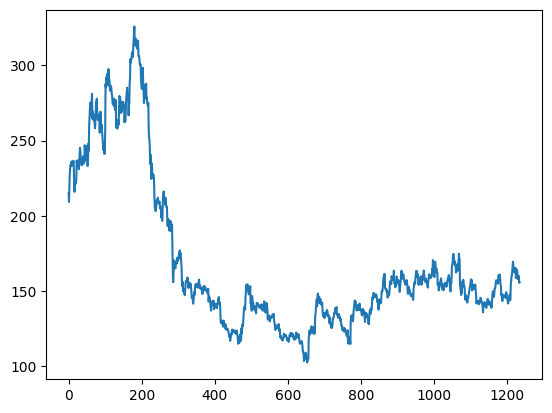

In [29]:
import matplotlib.pyplot as plt
plt.plot(df_1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [31]:
print(df_1)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]


In [32]:
training=int(len(df_1)*0.65)
testing=len(df_1)-training
train_data,test_data=df_1[0:training,:],df_1[training:len(df_1),:1]

In [33]:
import numpy
def createDataset(dataset, time_step=1):
  data_x, data_y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    data_x.append(a)
    data_y.append(dataset[i + time_step, 0])
  return numpy.array(data_x), numpy.array(data_y)

In [34]:
time_step = 100
xtrain, ytrain = createDataset(train_data, time_step)
xtest, ytest = createDataset(test_data, time_step)

In [35]:
Xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
Xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
trainPredict=model.predict(Xtrain)
testPredict=model.predict(Xtest)
trainPredict=scaler.inverse_transform(trainPredict)
testPredict=scaler.inverse_transform(testPredict)

11/11 [==============================] - 0s 38ms/step


**accuracy and metrics**

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,trainPredict))

102.86778739362296